### Initial value problems (IVPs) of Differential equations
* Ordinary differential equation: 
    * differential equation with one or more functions of one independent variable
    * for this notebook y is usually dependent, t is independent

 * ODE + initial condition is an initial value problem (IVP)
 * initial condition is solution at an initial time $t_0$

ODE: $\frac{dy}{dt} = f(t,y)\; $ IC: $y(t_0) = y_0 = y(0)$

**Methods to solve:**

1. Iterative stepping with one of below methods (RK2, RK4, etc)
    A. 'scipy' as multiple built in methods to solve

**Euler method (RK1):**

* Most basic method to solve
* Stepping method to compute next value 

1. Compute approximate derivative with simple forward difference
    $$\frac{dy}{dt} = f(t,y)\; \rightarrow \frac{y_{n+1} - y_n}{h}\approx f(t_n, y_n)$$
2. Use $y_n$ and $t_n$ to compute $y_{n+1}$
    $$ y_{n+1} = y_n + h f(t_n, y_n)$$
3. Continue until end of t

**Euler-Cauchy(RK2):**

1. Compute derivative at initial time (left side of interval)
$$rate_{left} = f(t, y(t)) = f_0$$
2. Use derivative to calculate estimate of derivative at middle of interval
$$y_{mid} = y(t) + \frac{h}{2} rate_{left}$$
3. use mid interval value to estimate rate of change over interval
$$rate_{mid} = f(t+\frac{h}{2}, y_{mid}) = f_1$$
4. Put it all together to calcuate $y_{n+1}$
$$y_{RK2}(t+h) = y(t)+h f\big(t+\frac{h}{2}, y(t)+\frac{h}{2} \; f(t,y(t)) \big)$$

**Runge-Kutta(RK4):**
* takes 4 function evaluations over interval

$$y_{n+1} = y_n + \frac{h}{6} [f_1 + 2 f_2 +2 f_3 + f_4]$$

**Runge Kutta Fehlberg (RKF45):**
* combines 4th and 5th order with adaptive stepsize to reduce error
* self starting and no need for $y_{n-1}$ information


### ODE forms (order)

#### First order 
$ \frac{dy}{dt} = \lambda y$

Analytical solution: $ y = c_1 e^{\lambda t} $

$\lambda < 0$: exponential decay

$\lambda > 0$: exponential growth

Numerical solution: 

1. Solve with iterative solver (ex: RK45)

#### Second order

$\frac{d^2 y}{dt^2} = \lambda y $

Analytical solution: $y = c_1 \mathrm{exp}(\sqrt{\lambda} x) + c_2 \mathrm{exp}(-\sqrt{\lambda} x)$

Numerical solution: 

1. Convert to system of 1st order ODEs
2. Solve with iterative solver



### ODE forms (system)

higher order:
* for n degree equation:
    * introduce an array of $n$ variables corresponding to each variable and its first order derivaties
    * This makes a system of $n$ 1st order derivative equations
    * The $nth$ equation in the system becomes the original equaiton in terms of new variables. 

#### Example
Convert higher level ODE to system of 1st order ODEs

1. Rearrange ODE with highest order derivative by itself: $\frac{dy_N}{dt}=RHS$
1. Replace every solitary independent variable on $RHS$ with $y_0$
2. Replace every n-th order derivative on $RHS$ with $y_n$
3. Write $f(\boldsymbol{y},t) = \frac{d\boldsymbol{y}}{dt} = \frac{d}{dt} \begin{pmatrix} y_0\\y_1\\\vdots\\y_N \end{pmatrix}= \begin{pmatrix} y_1\\y_2\\ \vdots\\\ RHS \end{pmatrix}$

__Application__:

1. $y'' = RHS = (cos^2\space x)y - (x^2 - sin \space x)y' + 5$
2. $RHS = (cos^2\space x)y_0 - (x^2 - sin \space x)y_1 + 5$
3. $f(\boldsymbol{y},t) = \frac{d\boldsymbol{y}}{dt} = \frac{d}{dt} \begin{pmatrix} y_0\\y_1 \end{pmatrix} = \begin{pmatrix} y_1\\(cos^2\space x)y_0 - (x^2 - sin \space x)y_1 + 5 \end{pmatrix}; \quad y_0(0)=3,\quad y_1(1) = 5$


#### Example of system of 1st order

* Equations representing predator and prey 

Predetor equation: $ dx/dt = \alpha x - \beta x y$

Prey equation: $dy/dt = \delta x y - \gamma y$

* After rewrite to vector of single variable

$\begin{aligned}
y_0' &= \alpha y_0 - \beta y_0 y_1 \\ 
y_1' &= -\gamma y_0 +\delta y_0 y_1
\end{aligned}$


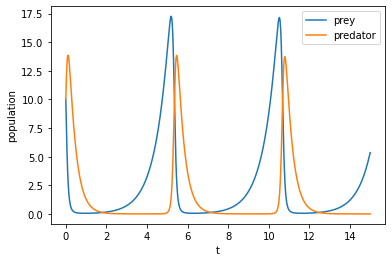

In [4]:
# Example of built in IVP solving
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def lotka_volterra(t, y):
    return np.array([alpha * y[0] - beta*y[0]*y[1], delta*y[0]*y[1] - gamma*y[1]])

alpha = 1.5
beta = 1.0
gamma = 3.0
delta = 1.0
steps = 500
y0 = np.array([10., 10.])
t0 = 0
tf = 15
t = np.linspace(0,15,steps+1)
sol = sp.integrate.solve_ivp(lotka_volterra, t_span=(t0,tf), y0=y0, method='RK45', t_eval=t)
# this examples uses method=RK4, look up documentation for other and better options

plt.plot(t, sol.y[0], label="prey")
plt.plot(t, sol.y[1], label="predator")
plt.xlabel("t")
plt.ylabel("population")
plt.legend()
plt.show()

# Note: This solver returns an object with solution results

### Error analysis

Differential equation has a continuously variable independent variable domain.
* All methods require breakdown into discrete time steps(discritization)
* Iteration formula: formula for calculating the next independent variable

**Explicit method/forward euler method:**
* the iteration formula specifies $y_{n+1}$ as an explicit function of values
* has 1st order globral trunction error and 2nd order local truncation error (because 2nd order forward difference scheme)
* for $\lambda < -10$: need sufficiently small step size or it wont converge
* Only stable for $ -2 < \lambda h < 0$
* method is not computationally expensive

**Implicit method/backwards euler method:**
* Instead of $y'(t_n) = \frac{1}{h} (y_{n+1}-y_n)$, 
    use $y'(t_{n+1}) = \frac{1}{h} (y_{n+1}-y_n)$ to obtain: $$y_{n+1} = y_n + h f(t_n, y_{n+1})$$
* method is stable everywhere else when $ 0 < \lambda h < 2$

**Predictor-corrector methods:**
* Better solution for systems not stable in forward euler
* Adams-bashforth
* Adams-Moulton 


### Boundary value problems (BVPs)
* ODE + boundary conditions is an initial value problem (IVP)
    * boundary conditions are specified at the endpoints of the domain

$$\frac{d^2 y}{dt^2} = f \big(t, y, \frac{dy}{dt} \big)$$
$$y(a) = \alpha , y(b) = \beta$$


**Methods to solve:**

1. Shooting method
    1. Satisfy conditions at one end point 
    2. Apply stepping method for numerical solution
    3. Evaluate residual (difference between stepping result and other boundary condition)
    4. Adjust guess until residual is less than tolerance
    
2. Direct solve 

    1. Direct solve as eigenvalue problem
    2. Direct solve with built in functions

#### Direct solve as eigenvalue problem

Method

1. Discritize independent variable domain into steps $h$
2. Approximate derivatives using finite difference formulas
3. Input finite difference formulas into differential equation
4. Solve for unknown values of dependent variable $A y = b$

In [ ]:
# Example of solving eigen function problem

#### Example BVP

Schrodinger equation with potential well $n(x)$

2nd order ODE: $\frac{d^2 y}{dx^2} + [n(x)-\beta_n] y = 0$

BCs: $y(-1)=0, y'(-1)=0$

In [6]:
# example of built in BVP solver

from scipy import integrate

def schrodinger(t, y):
    return np.array([x[1], (beta-n0)*x[0]],dtype=np.float64)

beta = 1.0

steps = 500
y0 = np.array([-1, 1])
t0 = 0
tf = 15
x = np.linspace(-1,1,steps+1)
sol = sp.integrate.solve_bvp(schrodinger, bc, x, y)

plt.plot(t, sol.y[0])
plt.title("Eigenfunctions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-fa6f6c141435>, line 15)